In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')
%matplotlib inline
from textwrap import wrap

In [15]:
import plotly
print plotly.__version__  
from plotly.graph_objs import Scatter, Layout
import plotly.plotly as py
import cufflinks as cf

import plotly.graph_objs as go

cf.set_config_file(offline=False, world_readable=True, theme='pearl')

2.0.5


In [16]:
sp500 = pd.read_csv('./Data/sp500.csv', index_col=0)

In [17]:
sp500.head()

,tickers,sectors
0,MMM,Industrials
1,ABT,Health Care
2,ABBV,Health Care
3,ACN,Information Technology
4,ATVI,Information Technology


In [18]:
ticker_group = sp500.groupby('sectors').count().tickers

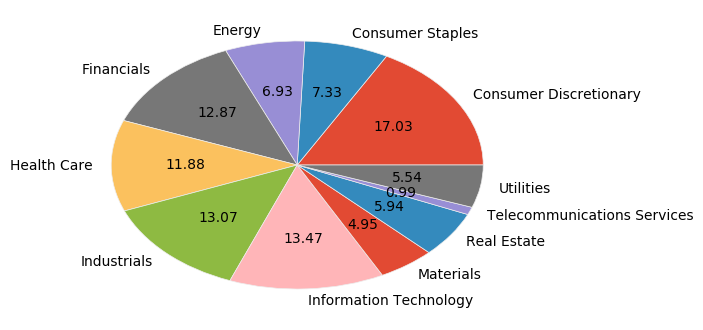

In [19]:
ticker_group.rename("").plot.pie(y=None, autopct="%.2f", )
plt.savefig("sp500_pie.png", bbox_inches='tight', pad_inches=0)

In [20]:
years = [str(year) for year in range(2008,2017)]
corr_stat_dict = {}
for year in years:

    corr_stat = pd.read_csv('Results/corr_' + year +'_Nodes_stats.csv', index_col=0)
    corr_stat_dict[year] = corr_stat

In [21]:
n_file = len(years)

In [22]:
corr_stat_dict['2008'].degree.mean()

110.59447004608295

In [23]:
mean_stat = {key:[corr_stat_dict[key].degree.mean(), corr_stat_dict[key].clustering.mean(), corr_stat_dict[key].eigencentrality.mean()] for key in years}

In [24]:
mean_stat

{'2008': [110.59447004608295, 0.724234775774491, 0.393863895957365],
 '2009': [67.47340425531915, 0.7015395933411087, 0.3409544509265923],
 '2010': [87.26288659793815, 0.734314166466307, 0.40122117757590076],
 '2011': [216.3920704845815, 0.8283861387385096, 0.6292217351815169],
 '2012': [12.20983606557377, 0.5057264385079047, 0.12979496584490313],
 '2013': [11.38047138047138, 0.555405460121582, 0.13385957664705844],
 '2014': [15.766871165644172, 0.6390643662891552, 0.15280358644378908],
 '2015': [33.722627737226276, 0.6845938372751694, 0.2111838683071139],
 '2016': [16.41038961038961, 0.5971761670632953, 0.14835066623932372]}

In [25]:
mean_stat_df = pd.DataFrame(mean_stat).transpose()
mean_stat_df.rename(columns={0:"Degree_mean",1:"Clustering_mean",2:"Eigencentrality_mean"},inplace=True)

In [26]:
mean_stat_df["Degree_mean"]

2008    110.594470
2009     67.473404
2010     87.262887
2011    216.392070
2012     12.209836
2013     11.380471
2014     15.766871
2015     33.722628
2016     16.410390
Name: Degree_mean, dtype: float64

In [27]:
mean_stat_df["Degree_mean"].iplot(kind="bar", bargap =0.5,title = "Mean of Degree in Year 2008-2016", xTitle="Year", yTitle="Degree_Mean")

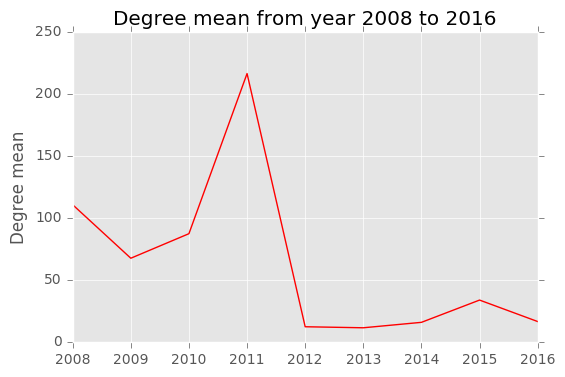

In [28]:

plt.plot(mean_stat_df.Degree_mean,'r')
plt.ticklabel_format(useOffset=False)
plt.title("Degree mean from year 2008 to 2016")
plt.ylabel("Degree mean")

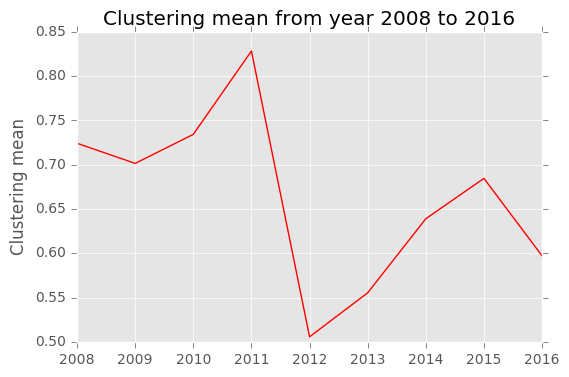

In [29]:

plt.plot(mean_stat_df.Clustering_mean,'r')
plt.ticklabel_format(useOffset=False)
plt.title("Clustering mean from year 2008 to 2016")
plt.ylabel("Clustering mean")

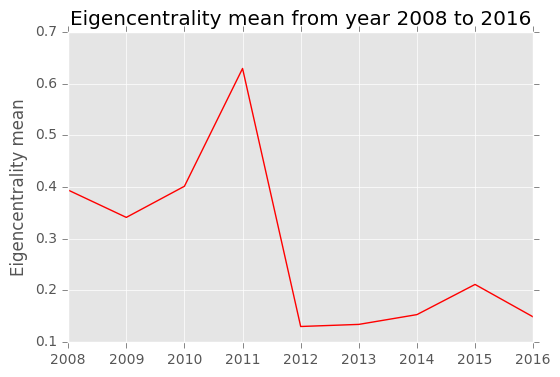

In [30]:

plt.plot(mean_stat_df.Eigencentrality_mean,'r')
plt.ticklabel_format(useOffset=False)
plt.title("Eigencentrality mean from year 2008 to 2016")
plt.ylabel("Eigencentrality mean")

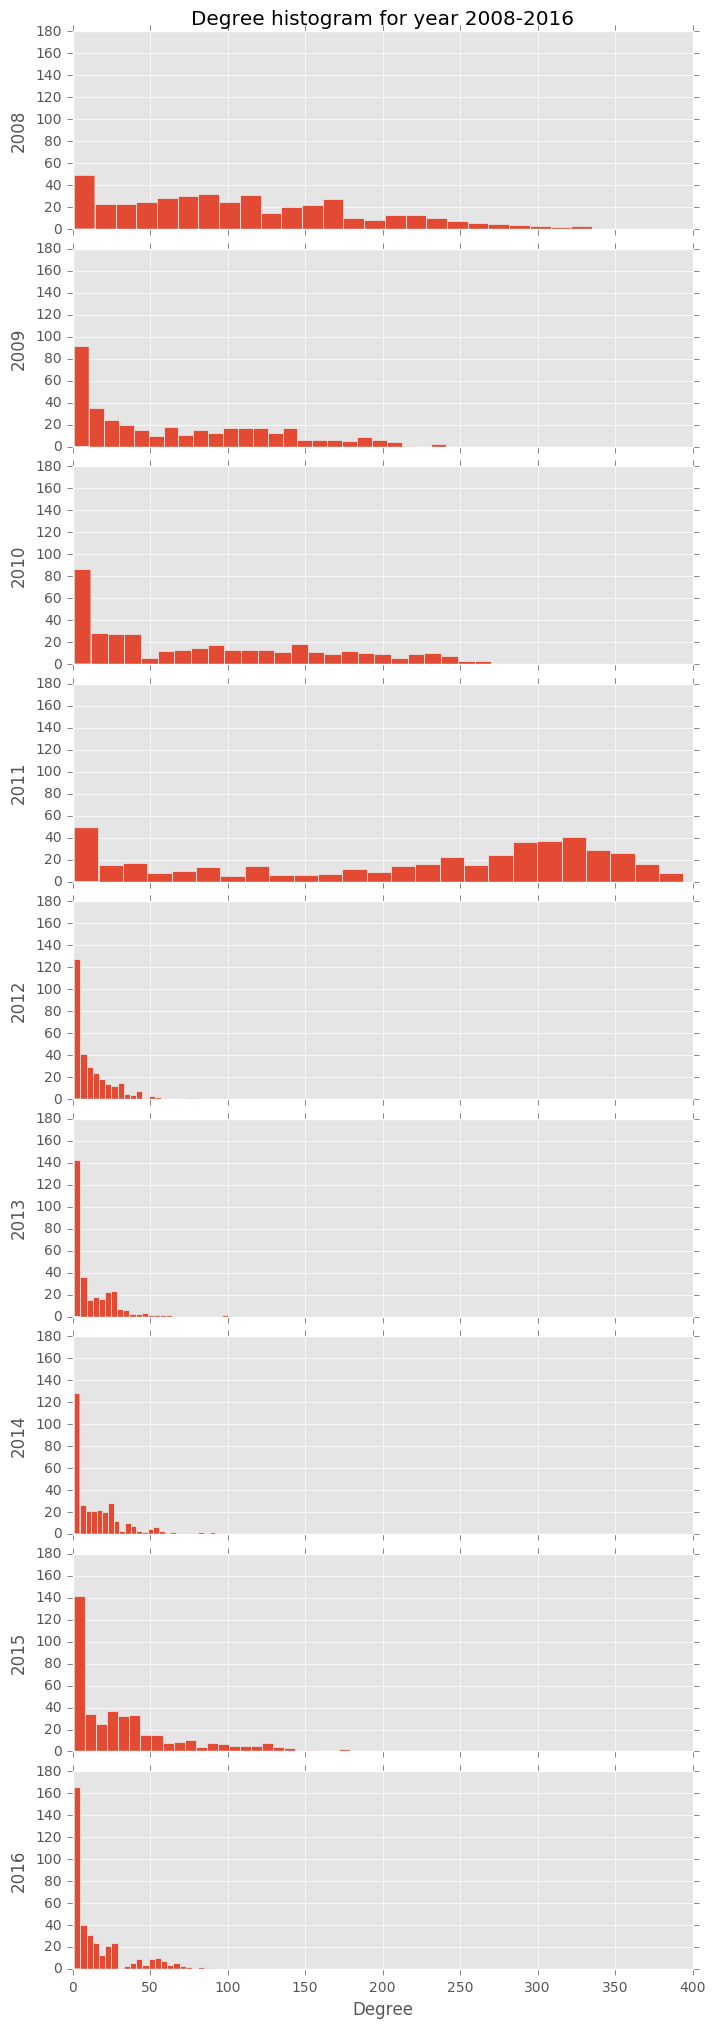

In [31]:
f, axarr = plt.subplots(n_file, sharex=True, sharey = True, figsize=(8,25))
for i in range(n_file):
    plot_year = str(i+2008)
    axarr[i].hist(corr_stat_dict[plot_year].degree, bins=25)
    axarr[i].set_xlim([0,400])
    axarr[i].set_ylim([0,180])
    axarr[i].set_ylabel(plot_year)
    if i ==0:
        axarr[i].set_title("Degree histogram for year 2008-2016")
    if i == (n_file-1):
        axarr[i].set_xlabel("Degree")
        
f.subplots_adjust(hspace=0.1)
plt.savefig('degree hist from 2008-2016.png', format='png')

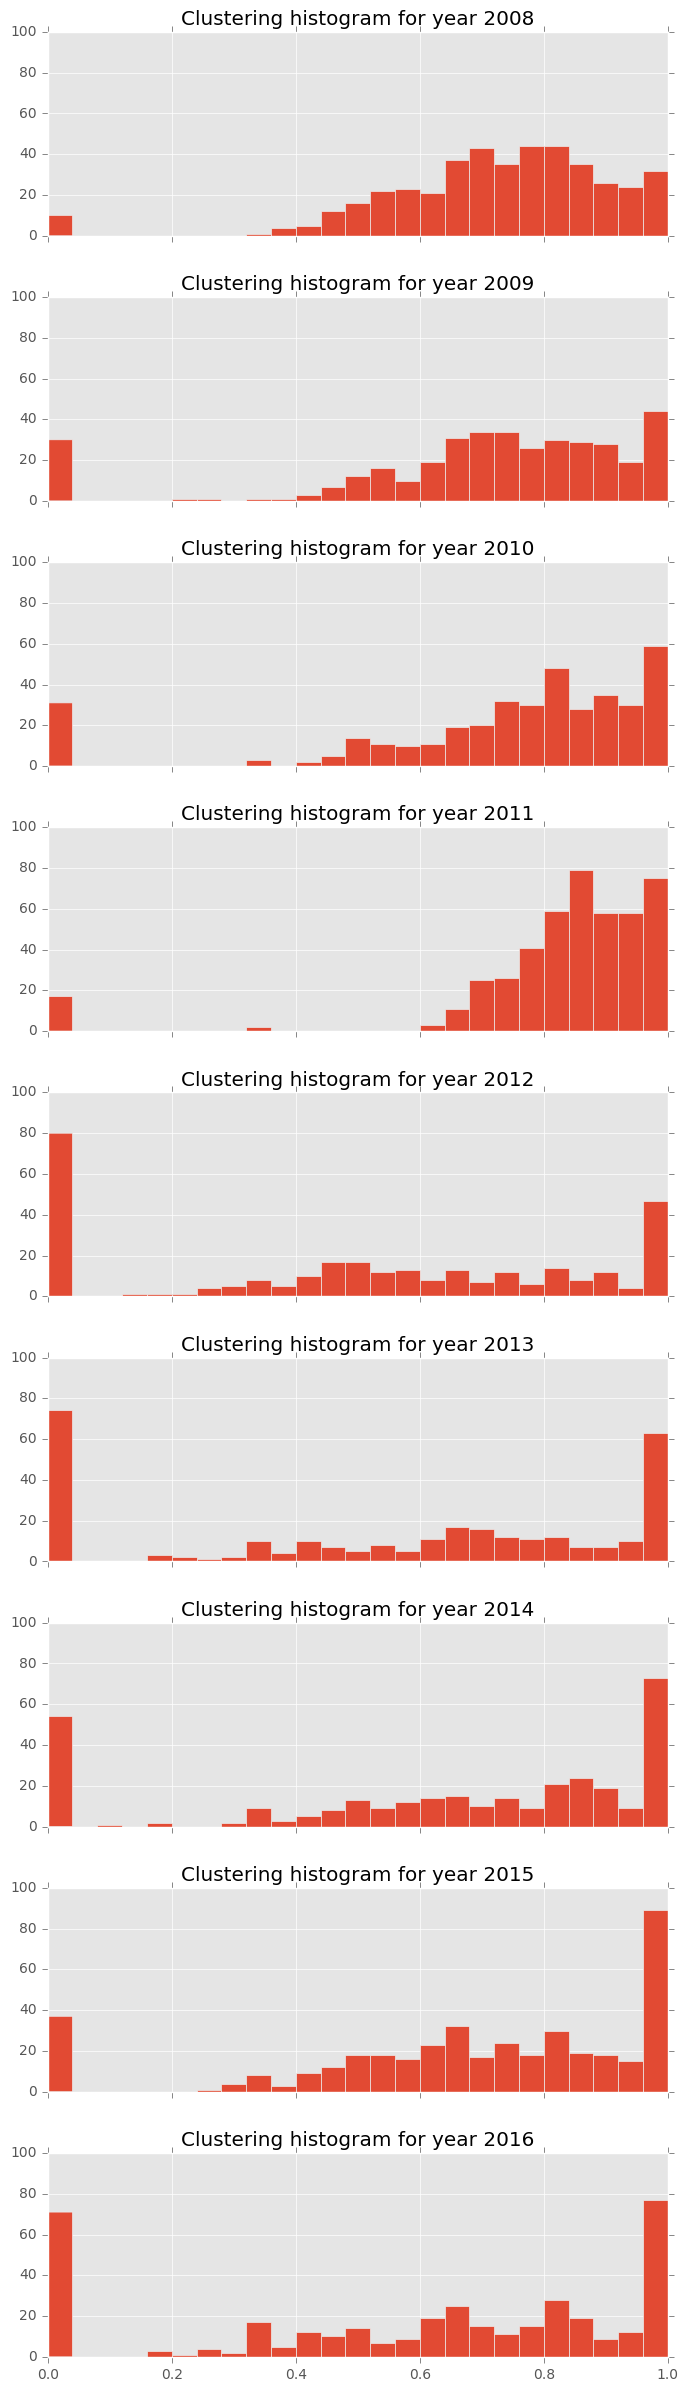

In [32]:
f, axarr = plt.subplots(n_file, sharex=True, sharey = True, figsize=(8,30))
for i in range(n_file):
    plot_year = str(i+2008)
    axarr[i].hist(corr_stat_dict[plot_year].clustering, bins=25)
    axarr[i].set_xlim([0,1])
    axarr[i].set_ylim([0,100])
    axarr[i].set_title("Clustering histogram for year "+plot_year)
f.subplots_adjust(hspace=0.3)
plt.savefig('clustering hist from 2008-2016.png', format='png')

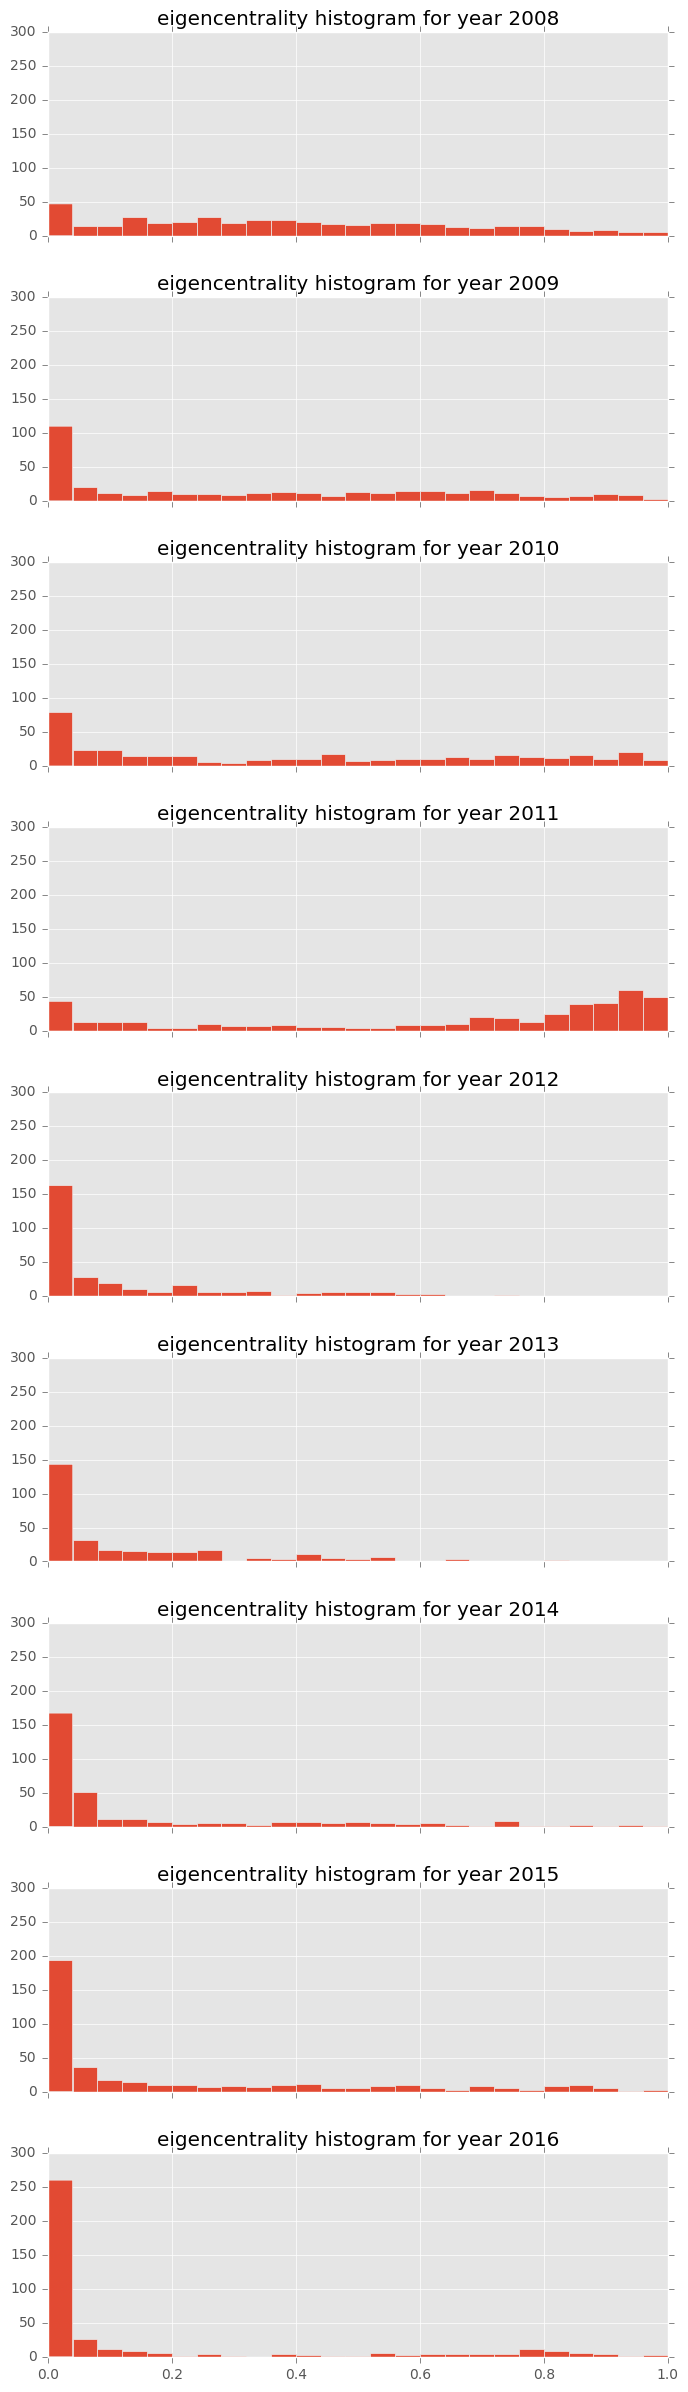

In [33]:
f, axarr = plt.subplots(n_file, sharex=True, sharey = True, figsize=(8,30))
for i in range(n_file):
    plot_year = str(i+2008)
    axarr[i].hist(corr_stat_dict[plot_year].eigencentrality, bins=25)
    axarr[i].set_xlim([0,1])
    axarr[i].set_ylim([0,300])
    axarr[i].set_title("eigencentrality histogram for year "+plot_year)
f.subplots_adjust(hspace=0.3)
plt.savefig('eigen hist from 2008-2016.png', format='png')

In [34]:
n_mod = {}
for item in corr_stat_dict:
    df = corr_stat_dict[item]
    n_df = len(df.groupby(by = 'modularity_class'))
    n_mod[item] = n_df

In [35]:
n_mod_df = pd.DataFrame(n_mod,index=['n_mod']).transpose()

In [36]:
n_mod_df.iplot(kind = "bar", bargap = 0.5, title = "Number of Modules in Year 2008-2016", xTitle = "Year", yTitle="Number of Modules")

In [40]:
mod_max = n_mod_df.n_mod.max()
mod_max

36

In [41]:
def degree_sector(sector):
    sector_df = pd.DataFrame(0, index=np.arange(36),columns=years)
    for item in corr_stat_dict:
        df = corr_stat_dict[item]
        n = n_mod[item]
        df_group = df.groupby(by = ['modularity_class','0'])
        
        df_mean = df_group.degree.mean()
        for x in range(n):
            if sector in df_mean[x]:
                sector_df.ix[x,item] = df_mean[x][sector]
    return sector_df

/Users/wenqian/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning:

in the future, full(9, 0) will return an array of dtype('int64')

/Users/wenqian/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning:

in the future, full(9, 1) will return an array of dtype('int64')

/Users/wenqian/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning:

in the future, full(9, 2) will return an array of dtype('int64')

/Users/wenqian/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning:

in the future, full(9, 3) will return an array of dtype('int64')

/Users/wenqian/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning:

in the future, full(9, 4) will return an array of dtype('int64')

/Users/wenqian/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:301: FutureWarning:

in the future, full(9, 5) will return an array of dtype('int64')

/Users/wenqian/anaconda/lib/python

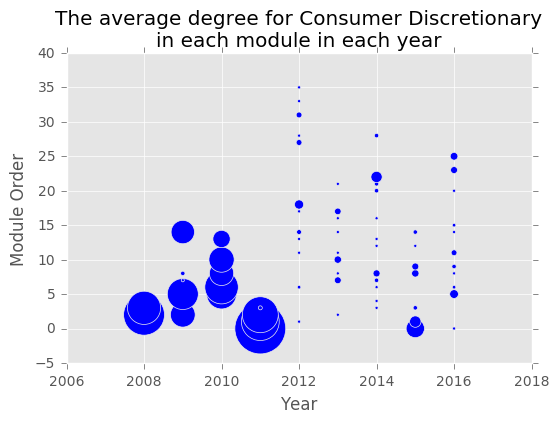

In [42]:
estate = degree_sector('Consumer Discretionary')

for i in range(len(estate)):
    plt.scatter(estate.columns.map(float),np.full(len(estate.columns),i),s=estate.iloc[i,:]*5)
plt.xlabel("Year")
plt.ylabel("Module Order")
plt.title("\n".join(wrap("The average degree for Consumer Discretionary in each module in each year",45)))
plt.savefig("Consumer.png", bbox_inches='tight', pad_inches=0)

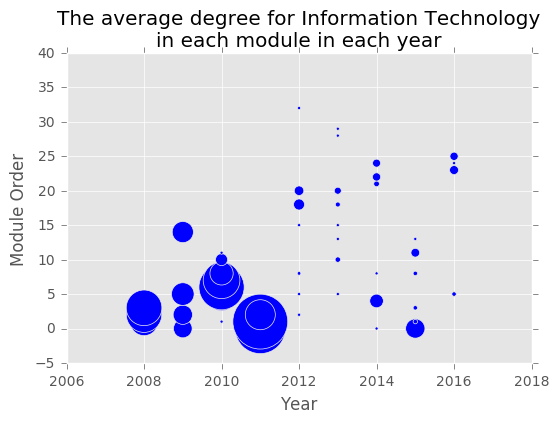

In [43]:
estate = degree_sector('Information Technology')

for i in range(len(estate)):
    plt.scatter(estate.columns.map(float),np.full(len(estate.columns),i),s=estate.iloc[i,:]*5)
plt.xlabel("Year")
plt.ylabel("Module Order")
plt.title("\n".join(wrap("The average degree for Information Technology in each module in each year",45)))
plt.savefig("IT.png", bbox_inches='tight', pad_inches=0)

In [44]:
df = corr_stat_dict['2010']

In [45]:
df_group = df.groupby(by=['modularity_class','0'])

In [46]:
n=n_mod['2010']

In [47]:
df_mean = df_group.degree.mean()

In [48]:
n

14

In [49]:
df_mean

modularity_class  0                          
0                 Consumer Staples                 1.000000
1                 Information Technology           1.000000
2                 Health Care                      1.000000
3                 Health Care                      4.000000
4                 Consumer Discretionary           1.333333
5                 Consumer Discretionary          92.025000
                  Consumer Staples                 3.000000
                  Financials                     156.833333
                  Health Care                    180.000000
                  Industrials                    147.521739
                  Information Technology         114.250000
                  Materials                      180.333333
                  Real Estate                    141.913043
6                 Consumer Discretionary         116.000000
                  Consumer Staples                 1.000000
                  Energy                          92.2

In [50]:
plly_key = "EoLZ7EnrJehfXc8qXEIG"

In [53]:
degree_time = {}

In [54]:
for year in years:
    degree_time[year] = corr_stat_dict[year].degree

In [55]:
degree_time_df = pd.DataFrame(degree_time)

In [59]:
degree_time_df

,2008,2009,2010,2011,2012,2013,2014,2015,2016
A,243.0,106.0,180.0,333.0,11.0,NaN,1.0,101.0,32.0
AAL,3.0,3.0,2.0,4.0,2.0,1.0,4.0,4.0,5.0
AAP,59.0,2.0,1.0,2.0,NaN,NaN,2.0,NaN,1.0
AAPL,21.0,20.0,23.0,15.0,NaN,NaN,NaN,1.0,NaN
ABBV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
ABC,26.0,2.0,2.0,107.0,NaN,NaN,3.0,1.0,2.0
ABT,38.0,NaN,3.0,134.0,NaN,NaN,NaN,100.0,3.0
ACN,83.0,NaN,NaN,255.0,3.0,NaN,7.0,93.0,1.0
ADBE,220.0,68.0,NaN,248.0,1.0,NaN,NaN,4.0,12.0
ADI,82.0,10.0,66.0,238.0,40.0,10.0,10.0,7.0,15.0


In [58]:
degree_time_df.iplot(kind = "scatter")

In [56]:
degree_time_df.iplot(kind="histogram",bins=50, colorscale = 'RdBu', width = 0.1, title = "Degree Histogram from Year 2008-2016", xTitle = "Degree", yTitle = "Count")